Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 85ms/step - accuracy: 0.3275 - loss: 1.8117
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5367 - loss: 1.2898
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.6100 - loss: 1.1071
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6482 - loss: 1.0064
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.6751 - loss: 0.9261
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6717 - loss: 0.9549
Precisión en el conjunto de prueba: 0.67
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


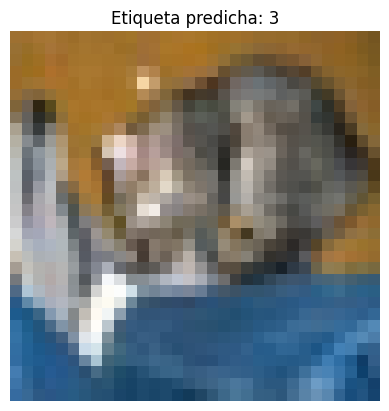

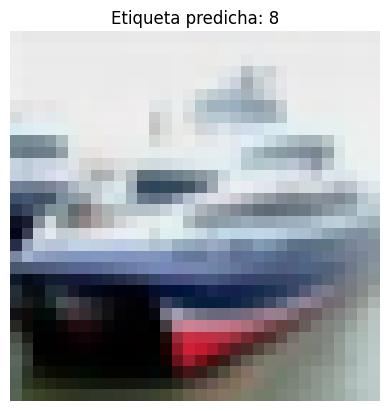

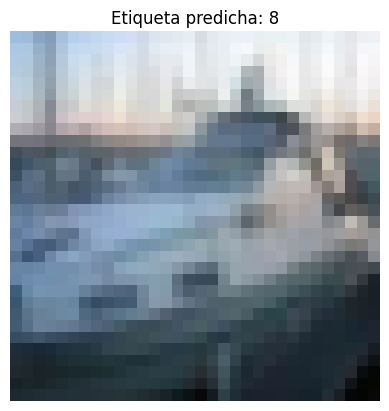

'\nObservaciones:\n1. La arquitectura utilizada es básica y permite resultados aceptables para el dataset CIFAR-10 (70%).\n2. El modelo podría mejorar con más capas, técnicas de aumento de datos o redes preentrenadas como ResNet.\n3. Categorías:\n    0.- Avión, 1.- Automóvil, 2.- Pájaro, 3.- Gato, 4.- Ciervo,\n    5.- Perro, 6.- Rana, 7.- Caballo, 8.- Barco, 9.- Camión.\n'

In [2]:
"""
Este código entrena una CNN para clasificar imágenes del dataset CIFAR-10, que contiene 10 categorías como aviones, automóviles y animales.
La red neuronal usa tres capas convolucionales, max-pooling, y una capa densa para predecir la clase de cada imagen.
"""

# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255  # Normalizar imágenes
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)  # Convertir etiquetas a one-hot encoding
test_labels = to_categorical(test_labels)

# Construcción del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluación
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')

# Predicciones y visualización
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Etiqueta predicha: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()

"""
Observaciones:
1. La arquitectura utilizada es básica y permite resultados aceptables para el dataset CIFAR-10 (70%).
2. El modelo podría mejorar con más capas, técnicas de aumento de datos o redes preentrenadas como ResNet.
3. Categorías:
    0.- Avión, 1.- Automóvil, 2.- Pájaro, 3.- Gato, 4.- Ciervo,
    5.- Perro, 6.- Rana, 7.- Caballo, 8.- Barco, 9.- Camión.
"""

